In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
#Initializing the population
N = 10000

A = np.zeros(int(N))
B = np.ones(0)

pop  = np.concatenate([A,B])
np.random.shuffle(pop)


r = 1.001
u = 0.01

j = 1

normalized_r_A = r / (1 + r)
normalized_r_B = 1 / (1 + r)

freq_of_B = np.array([])

for i in range(15000000):
    
    reproduce = np.random.randint(0,N)
    kill      = np.random.randint(0,N)
    
    if pop[reproduce] == 0:
    
        rand1 = np.random.random()
        if rand1 < normalized_r_A:
            
            rand2 = np.random.random()
            if rand2 < u:
                
                pop[kill] = 1
                
                # To save memory for storing the matrix freq_of_B, I am only updating it after ever 5000 iterations
                if i > j:
                    freq_of_B = np.append(freq_of_B,  np.sum(pop))
                    j = j + 5000
    
                
            else:
                
                pop[kill] = 0
                
                if i > j:
                    freq_of_B = np.append(freq_of_B, np.sum(pop))
                    j = j + 5000
                
        continue
            
    else:
        
        rand = np.random.random()
        if rand < normalized_r_B:
            pop[kill] = pop[reproduce]
            
            if i > j:
                freq_of_B = np.append(freq_of_B, np.sum(pop))
                j = j + 5000
            
        continue
        

In [105]:
print("No. of type 1 in population = " + str(np.sum(pop)))

No. of type 1 in population = 10000.0


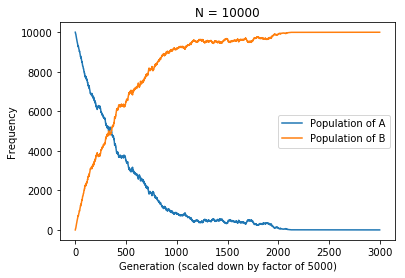

In [107]:
#Plot

x = np.arange(0, freq_of_B.size)
y = freq_of_B
z = N - freq_of_B
plt.xlabel('Generation (scaled down by factor of 5000)')
plt.ylabel('Frequency')
plt.plot(x,z)
plt.plot(x,y)
plt.legend(['Population of A', 'Population of B'])
plt.title('N = 10000')
#plt.savefig('Plot.png')

In [106]:
print("Theoretical frequency of Type 1 at equilibrium = 1, which matches with the value from the simulation.")

Theoretical frequency of Type 1 at equilibrium = 1, which matches with the value from the simulation.
